# CNNs!

CNNs achieve state of the art results in a variety of problem areas including Voice User Interfaces, Natural Language Processing, and computer vision. Let's explore some examples:

- [WaveNet](https://deepmind.com/blog/article/wavenet-generative-model-raw-audio): AI trained to sing.
- [Text Classification](http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/)
- [Facebook's novel CNN approach](https://engineering.fb.com/2017/05/09/ml-applications/a-novel-approach-to-neural-machine-translation/)
- [Play Atari games](https://deepmind.com/research/publications/human-level-control-through-deep-reinforcement-learning) Here also the [code](https://sites.google.com/a/deepmind.com/dqn/)
- [Play pictionary](https://quickdraw.withgoogle.com/#) with a CNN
- Some of the world's most famous paintings have been turned into 3D for the visually impaired. Although the article does not mention how this was done, we note that it is possible to use a CNN to [predict depth](https://www.cs.nyu.edu/~deigen/depth/) from a single image.
- Check out [this research](https://research.googleblog.com/2017/03/assisting-pathologists-in-detecting.html) that uses CNNs to localize breast cancer.
- CNNs are used to [save endangered species](https://blogs.nvidia.com/blog/2016/11/04/saving-endangered-species/?adbsc=social_20170303_70517416)!
- An app called [FaceApp](http://www.digitaltrends.com/photography/faceapp-neural-net-image-editing/) uses a CNN to make you smile in a picture or change genders

In general, CNNs can look at images as a whole and learn to identify patterns such as prominent colors and shapes, or whether a texture is fuzzy or smooth and so on. The shapes and colors that define any image and any object in an image are often called features. 

Let's cover how a CNN can learn to identify these features and how a CNN can be used for image classification. 


## What is a feature?

A helpful way to think about what a **feature** is, is to think about what we are visually drawn to when we first see an object and when we identify different objects. For example, what do we look at to distinguish a cat and a dog? The shape of the eyes, the size, and how they move are just a couple o examples of visual features.

As another example, say we see a person walking toward us and we want to see if it is someone we know; we may look at their face, and even further their general shape, eyes. The distinct shape of a person and their eye color a great examples of distinguishing features.


## MNIST Database

How can deep learning be used to recognize a single object in an image? The MNIST DB contains thousands of small gray scale images of hand-written digits. Each image depicts one of the numbers zero through nine. This databse is perhaps one of the most famous databases in the field of machine and deep learning. It was one of the first databases used to prove the usefulness of neural networks and has continued to inform the development fo new archtectures overtime. 

Using deep learning, we can take a data-driven approach to training an algorithm that can examine thses images and discover patterns that distinguish one item from another. Our algorithm will need to attain some level of understanding of how images of one item differs from images of another items. The first step in recognizing patterns in images is learning how images are seen by computers. Before we start to design algorithms, first visualize the data and take a closer look at the images.

We can appreciate [this figure](https://www.kaggle.com/benhamner/popular-datasets-over-time) that shows datasets referenced over time in [NIPS](https://nips.cc/) papers.

Any gray scale image is interpreted by a computer as an array, a grid of values for each cell is called a pixel, and each pixel has a numerical value:

<img src="assets/VisualizeData.png">

Each image in the MNIST database is 28 pixels high and wide. And so, it is understood by a computer as a 28 by 28 array. In a typical gray scale image, white pixels are encoded as the value 255, and black pixels are encoded as zero. Gray pixels fall somewhere in between, with light-gray being closer to 255. Color images have similar numerical representations for each pixel color. 

The MNIST images have actually gone through a quick pre-processing step. They have been rescaled so that each image has pixel values in a range from zero to one, as opposed to from 0-255:

<img src="assets/rescaledMNIST.png">

To go from a range of 0-255 to zero to one, we have to divide every pixel value by 255. This step is known as normalization, and it is common practice in many deep learning techniques. Normalization help our algorithm to train better.

The reason we typically want normalized values is because neural networks rely on gradient calculations. These networks are trying to learn how important or how weighty a certain pixel should be in dettermining the clas of an image. Normalizing the pixel values helps these gradient calculations stay consistent, and not get so large that they slow down or prevent a network from training. 

We know a method of classification, using a multi-layer perceptron. How might we input this image data into an MLP? Recall that MLPs only take vectors as input. In order to use an MLP with images, we have to first convert any image array into a vector. This process is called as flattening. To understand this process, image we have a matrix with 16 pixel values (4x4). Instead of representing this as a 4x4 matrix, we can construct a vector with 16 entries, where the first first four entrie of our vector correspond to the firt wheel of our old array. The second four entries correspond to the second wheel and so on. 

After we convert our images into vectors, they can be fed into the input layer of an MLP:

<img src="assets/flatteningImage7.png">

So, in cas of our MNIST images, 28x28 matrices, we will have 784 entries corresponding to our vector of our flattened image.

Data normalization is typically done by subtracting the mean (the average of all pixel values) from each pixel, and then dividing the result by the standard deviation of all the pixel values. Sometimes you'll see an approximation here, where we use a mean and standard deviation of 0.5 to center the pixel values. [Read more about the Normalize transformation in PyTorch](https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-torch-tensor).

The distribution of such data should resemble a [Gaussian function](https://mathworld.wolfram.com/GaussianFunction.html) centered at zero. For image inputs we need the pixel numbers to be positive, so we can often choose to scale the data in a normalized range `[0, 1]`.


## MLP Structure & Class Scores

Once we have normalized and flattened our data into vectors, we then create a neural network for discovering the patterns in our training data. After training, our network should be able to look at totally new images that it hasn't trained on, and classify the content in those images. This previously unseen data is often called test data. 

So comming back to our MNIST dataset, we have been converted images into vectors with 784 entries. So, the first input layer in our MLP should have 784 nodes. We want the output layer to distinguish between 10 different digit types, from zero to nine. So, we will want the last layer to have 10 nodes. Our model will take in a flattened image and produce 10 output values, one for each possible class. These output values are often called class scores. 

A high class score indicates that a network is very certain that a given input image falls into a certain class. The class scores are often represented as a vector of values or even as a bar graph indicating the relative strengths of the scores. 

The part of tour MPL architecture that is up to you to define is really in between the input and output layers. How many hidden layers do we want to include and how many nodes should be in each one? That is a recurrent question on MLP architecture definition, a recommendation is to start by looking at any papers or related work I can find that may act as a good guide. You can start with 1 or 2 hidden layers for a MLP for image classification.
You can look at [this file](https://github.com/keras-team/keras/blob/1a3ee8441933fc007be6b2beb47af67998d50737/examples/mnist_mlp.py) that used to be on Keras repo.

We know that the more hidden layers I include in the network, the more complex patterns this network will be able to detect, but we don't want to add unnecessary complexity either. We can intuite rhat for small images, two hidden layers sounds very reasonable. 

That intuition helps for solving a MNIST Digit dataset but we also could continue the research:
- 1.- Keep looking annd see if we can find another structure that appeals to you.
- 2.- When we fand a model or two that look interesting, try them out in code and see how well they perform. 


## Loss & Optimization

Well, we have defined a structure of our MLP, let's talk about how this entire thing will actually learn from the MS data. What happens when it actually sees an input image? Imagine we take a image from the MNIST dataset, a digit two, we flatten the image into a vector and it goes through our two hidden layers, we get these ten class scores for my output layer, again a high score mean that the network is more certain that the input image is of that particular class. 

At the beginning, the network will attempt to classify the image but incorrectly, we have to tell it to learn form mistakes. As a network trains, we measure any mistakes that it makes using a loss function, whose job is to measure the ifference between the predicted and true clas labels. Then using back propagation, we can compute the gradient of the loss with respect to the models' weights. In this way, we quantify how bad a particular weight is and find out which weights in the network are responsible for any errors. Finally, we use that calculation, we can choose an optimization function like gradient descent to give us a way to calculate a better weight value. 

Towards this goal, the first thing we need to do is make our output layer a bit more interpretable. What is commonly done is to apply a softmax activation function to convert these scores into probabilities. To apply a softmax function to  this output layer, we begin by evaluating the exponential function at each of the socres, then we add up all of the values. Then we divide each of these values by the sum. When we plug in all of the math, we get those 10 values. Now each value yields the probability that the image depicts its corresponding image class. 

Continuing our goal of update the weights of the network in response to the mistake, in order to predict that two is the most likely label. In a perfect world, the network would predict that the image is 100 percent likely to be the true class. In order to get the model's prediction closer to the ground truth, we will need to define some measure of exactly how far off the model currently is from perfection. We can use a los function to find any errors between the truth image classes and our predicted classes, the backpropagation will find out which model parameters are responsible for those errors. 

Since we are constructing a multi-class classifier, we will use categorical cross entropy loss. To calculate the loss we begin by looking at the model's predicted probability of the true class, cross entropy loss looks at that probability value and takes the negative log loss of that value. Now, for argument's sake, say instead that the weights of the network were slightly different. The model instead eturned at these predicted probabilities. That prediction is much better than the one first obtained, and when we calculate the cross entropy loss, we get a much smaller value. 

In general, it is possible to show that the categorical cross entropy loss is defined in such a way that the loss is lower when the model's prediction agrees more with the true class label, and it is higher when the prediction and the true class label disagree. As a model trains, its goal will be to find the weights that minimize that loss function and therefore give us the most accurate predictions. So a loss function and backpropagation give us a way to quantify how bad a particular netwoork weight is, based on how close a predicted and the true class label are from one another. Next, we need a wat to calculate a better weight value.

Previusly we reviewed the error function, which function was to find a way to descend to the lowest value. This is the role of an optimizer. The standard method for minimizing the loss and optimizing for the best weight values is called Gradient Descent. We already have been introduced to a number of ways to perform gradient descent and each method has a corresponding optimizer. All the optimizers are racing towards the minimum of the function. I encorage you to experiment with all of the available GD functions in your code!

<img src="assets/GradientDescentFunctions.png">

## ReLU activation function

So, remembering, the process to train an MLP to classify images is:
- Load and visualize data
- Define a neural network
- Train the model
- Evaluate the performance of our trained model on a test dataset

When we are defining our MLP model, we have talked about defining the input, hidden and output layers. Let's point our a couple of things here. First the init function, to define any neural network in PyTorch you have to define and name any layers that have learned weight values in the Init function. Next we have to define the feedforward behavior of our network. This is just how an input X will be passed through various layers and transformed. Make sure to flatten the input imag by using the `view` function. Once we have our vector, we pass it to our first fully-connected layer defined. A ReLU should be applied generally to the output of every hidden layer so that those outputs are consistent positive. Finally we return the transformated X.

The purpose of an activation function is to scale the outputs of a layer so that they are consistent, small value. Much like normalizing input values, this step ensures that our model trains efficiently.

A ReLU activation function stands for "Rectified Linear Unit" and is one of the most commonly used activation functions for hidden layers. It is an activation function, simply defined as the possitive part of the input. So for an input image with any negative pixel values, this would turn all those values to `0`. Sometimes this will be referred to as "clipping" the values to zero; meaning that is the lover bound.

## Training networks

When we have loaded our data and defined a model, we can continue defining our loss and optimization functions. For that we can start with Cross-Entropy loss and gradient descent. 

In the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions), we can see that the cross entropy loss function actually involves two steps:

- It first applies a softmax function to any output is sees
- Then applies NLLLoss; negative log likelihood loss

Also in the docs you can look at different loss functions.

Once we implement loss and optimization function, we can continue to the training loop, it is a good practice to start small if we are testing out different model architectures and then increase the number of epochs when we are trying to train our final model. 

So let's start with our exercise!

# Multi-Layer Perceptron, MNIST
---
We will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [1]:
# import libraries
import torch
import numpy as np

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

<ipython-input-3-731dd270b2c2>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


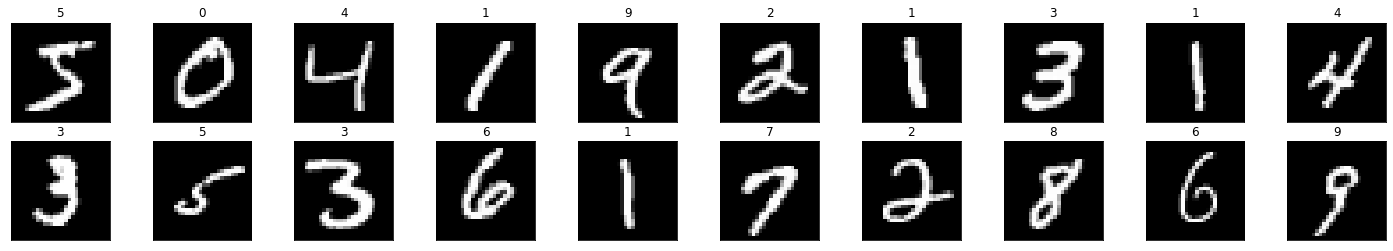

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an Image in More Detail

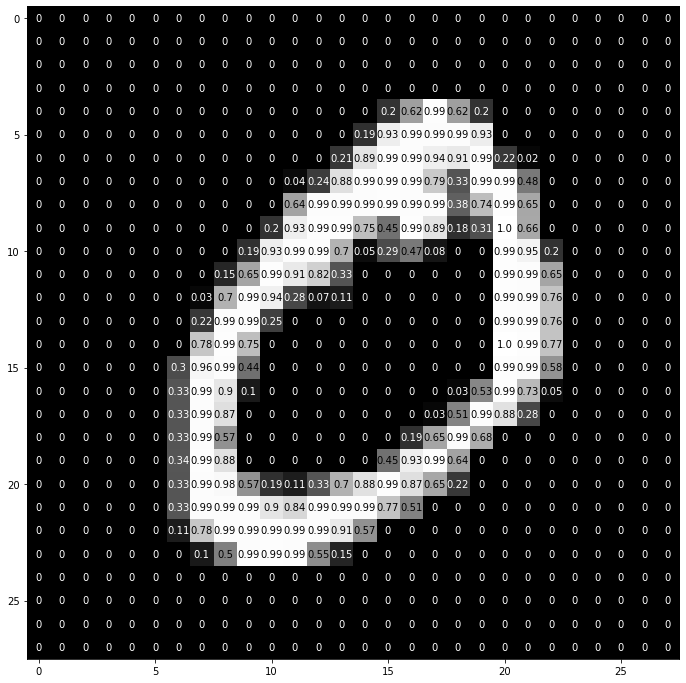

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add first hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add second hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        return x
# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [11]:
## TODO: Specify loss and optimization functions
from torch import optim

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [12]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.920796
Epoch: 2 	Training Loss: 0.550663
Epoch: 3 	Training Loss: 0.501389
Epoch: 4 	Training Loss: 0.470162
Epoch: 5 	Training Loss: 0.446270
Epoch: 6 	Training Loss: 0.426860
Epoch: 7 	Training Loss: 0.410357
Epoch: 8 	Training Loss: 0.395972
Epoch: 9 	Training Loss: 0.383433
Epoch: 10 	Training Loss: 0.372410
Epoch: 11 	Training Loss: 0.362874
Epoch: 12 	Training Loss: 0.354528
Epoch: 13 	Training Loss: 0.347173
Epoch: 14 	Training Loss: 0.340593
Epoch: 15 	Training Loss: 0.334656
Epoch: 16 	Training Loss: 0.329336
Epoch: 17 	Training Loss: 0.324457
Epoch: 18 	Training Loss: 0.319956
Epoch: 19 	Training Loss: 0.315847
Epoch: 20 	Training Loss: 0.312059
Epoch: 21 	Training Loss: 0.308538
Epoch: 22 	Training Loss: 0.305293
Epoch: 23 	Training Loss: 0.302264
Epoch: 24 	Training Loss: 0.299443
Epoch: 25 	Training Loss: 0.296787
Epoch: 26 	Training Loss: 0.294314
Epoch: 27 	Training Loss: 0.291984
Epoch: 28 	Training Loss: 0.289801
Epoch: 29 	Training Loss: 0.2

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [13]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.313542

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 98% (1123/1135)
Test Accuracy of     2: 97% (1008/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 98% (967/982)
Test Accuracy of     5: 98% (877/892)
Test Accuracy of     6: 96% (928/958)
Test Accuracy of     7: 97% (1004/1028)
Test Accuracy of     8: 96% (944/974)
Test Accuracy of     9:  0% ( 0/1009)

Test Accuracy (Overall): 88% (8811/10000)


### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

<ipython-input-14-48bf1d79b703>:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


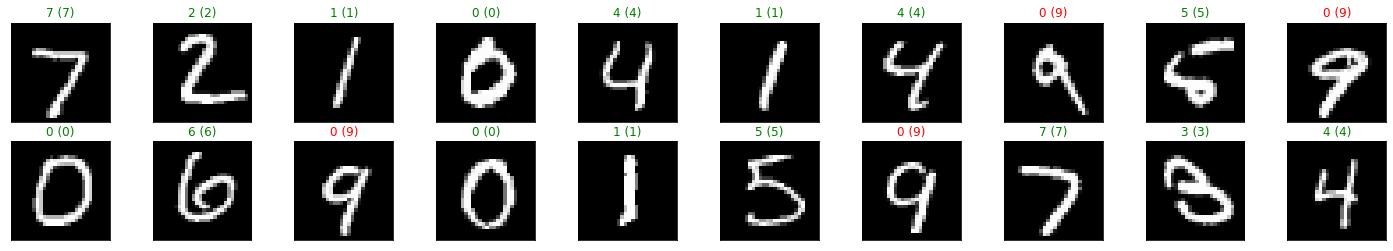

In [14]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Another way to solve the problem

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model1 = Net1()
print(model1)

Net1(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [17]:
# specify loss function (categorical cross-entropy)
criterion1 = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.01)

In [18]:
# number of epochs to train the model
n_epochs = 50

model1.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer1.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model1(data)
        # calculate the loss
        loss = criterion1(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer1.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.842072
Epoch: 2 	Training Loss: 0.330948
Epoch: 3 	Training Loss: 0.257591
Epoch: 4 	Training Loss: 0.207100
Epoch: 5 	Training Loss: 0.174266
Epoch: 6 	Training Loss: 0.149929
Epoch: 7 	Training Loss: 0.131877
Epoch: 8 	Training Loss: 0.117796
Epoch: 9 	Training Loss: 0.106460
Epoch: 10 	Training Loss: 0.096821
Epoch: 11 	Training Loss: 0.086542
Epoch: 12 	Training Loss: 0.080546
Epoch: 13 	Training Loss: 0.073443
Epoch: 14 	Training Loss: 0.069052
Epoch: 15 	Training Loss: 0.064320
Epoch: 16 	Training Loss: 0.060562
Epoch: 17 	Training Loss: 0.056698
Epoch: 18 	Training Loss: 0.052372
Epoch: 19 	Training Loss: 0.049037
Epoch: 20 	Training Loss: 0.046698
Epoch: 21 	Training Loss: 0.044410
Epoch: 22 	Training Loss: 0.041369
Epoch: 23 	Training Loss: 0.039588
Epoch: 24 	Training Loss: 0.036215
Epoch: 25 	Training Loss: 0.035043
Epoch: 26 	Training Loss: 0.033133
Epoch: 27 	Training Loss: 0.032106
Epoch: 28 	Training Loss: 0.030199
Epoch: 29 	Training Loss: 0.0

In [19]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model1.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model1(data)
    # calculate the loss
    loss = criterion1(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.055550

Test Accuracy of     0: 99% (973/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 98% (1013/1032)
Test Accuracy of     3: 98% (996/1010)
Test Accuracy of     4: 98% (966/982)
Test Accuracy of     5: 98% (878/892)
Test Accuracy of     6: 98% (942/958)
Test Accuracy of     7: 97% (1006/1028)
Test Accuracy of     8: 97% (949/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 98% (9835/10000)


<ipython-input-20-48bf1d79b703>:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


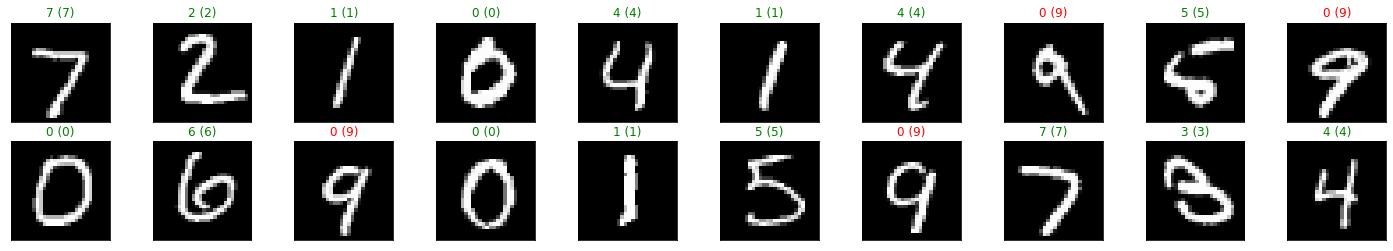

In [20]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

### Optional resources

This is the [first research paper](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) to propose dropout as a thechnique for overfitting.

And for more information about activation functions, check out this [website](http://cs231n.github.io/neural-networks-1/#actfun).

# Model validation 

We have checked how well our models are performing based on how the loss changes over each epoch, but the exact number of epochs to train for is often hard to determine. How many epochs should we train for so that our network is accurate but it is not overfitting the training data? 

One method that is used in practice involces breaking the dataet into three sets called training, validation, and test sets. Each is treated separately by the model. The model looks only at the training set when it is actively training and deciding how to modify its weights. After every training epoch, we check how the model is doing by looking at the training loss and the loss on the validation set. But it is important to note that the model does not use any part of the validation set for the backpropagation step. We use this training set to find all the patterns we can, and to update and determine the weights of our model. 

The validation set only tells us if that model is doing well on the validation set. In this way gives us an idea of how well the model generalizes to a set of data that is separate from the training set. The idea is, since the model doesn't use the validation set for deciding its weights, that it can tell us if we are overfitting the training set of data. 

Finally, the test set of data is saved for checking the accuracy of the model after it is trained. 

To be clear, lets use the following example:

In the next image we can notice that the model is overfitting the training data from 100 epochs to ahead because it is not generalizing well enough to also perform well the validation set. 

<img src="assets/ModelValidation.png">

So if we see this kind of divide and how the training and validation losses decrease, we will want to stop changing the weights of our network around epoch 100 and ignore or throw away the weights from later epochs where there is evidence of overfitting. 

This kind of process can also prove useful if we have multiple potential architectures to choose from. For example, if we are deciding on the number of layers to put in the model. Then we want to save the weights from each potential architecture for later comparison, and can choose to pick the model that gets the lowest validation loss. 

The idea with the third set, the test set, is that when we go to test the model, it looks at data that it has truly never seen before. Even though the model doesn't use the validation set to update its weights, our model selection process is based on how the model performs on both the training and valiation sets. So, in the end, the model is biased in favor of the validation set. Thus, we need a separate test set of data to truly see how our selected model generalizes and performs when given data it really has not seen before.


# Validation loss

Let's review in code how to implement what we have above. The first thing we will do is to create a validation dataset much like we created training and test sets. In fact, we actuallgy going to take a percentage of data from the training set. 

```
valid_size = 0.2 #Take 20% of the training set data
```

That 20% of data should be a good enough size since the MNIST dataset is very large. Then we are going to use something called subset random sampler to help me do the work of splitting the training data. 

```
from torch.utils.data.sampler import SubsetRandomSampler
```

First we record how many training images there are, and determine which indices in the training set we will access to create both sets training and validation. 

```
training_data =  datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data =  datasets.MNIST(root='data', train=False, download=True, transform=transform)
```


Then we list out all the possible indices by grabbing the length of the entire training set. So these indices are going to be the values that point to each of the 70,000 images in the training set. 

```
num_train = len(train_data)
indices = list(range(num_train))
```

Then, we are going to shuffle these indices so that any index we select out of this list will reference a random piece of data. 

```
np.random.shuffle(indices)
```

Then, we will define a split boundary, and this is just going to be the number of examples that we want to include in the validation set, what is going to be 20% of oug training data. 

```
split =  int(np.floor(valid_size * num_train))
```

After that, we will use this to get an 80-20 split between training and validation data.

```
train_idx, valid_idx = indices[split:], indices[:split]
```

Finally, we are using subset random sampler to create data samplers for this training and validation data. 

```
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
```

This adds one more argument to our training loader and validation loaders. So, previusly we had only training and test data loaders, and now we have split the training data into two sets by essentially shuffling it and selecting  20 percent for validation set using a specific data sampler. So, now 